In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "/Users/daniellomeland/Matplotlib/Pyber/data/city_data.csv"
ride_data_to_load = "/Users/daniellomeland/Matplotlib/Pyber/data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(city_data_df, ride_data_df, how="right", on="city")

# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

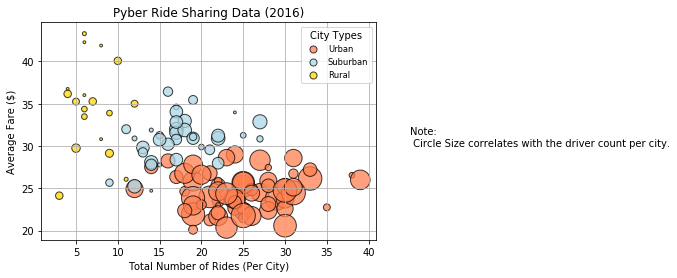

In [54]:

urban_type = df[df['type'] == 'Urban'].groupby([df['city']])
rural_type = df[df['type'] == 'Rural'].groupby([df['city']])
suburban_type = df[df['type'] == 'Suburban'].groupby([df['city']])

urban_type = df[df['type'] == 'Urban'].groupby([df['city']])
rural_type = df[df['type'] == 'Rural'].groupby([df['city']])
suburban_type = df[df["type"] == "Suburban"].groupby([df['city']])

# Obtain the x and y coordinates for each of the three city types
ride_urban = urban_type['ride_id'].count()
fare_urban = urban_type['fare'].mean()
drivers_urban = urban_type['driver_count'].mean()

ride_rural = rural_type['ride_id'].count()
fare_rural =rural_type['fare'].mean()
drivers_rural = rural_type['driver_count'].mean()

ride_suburban = suburban_type['ride_id'].count()
fare_suburban = suburban_type['fare'].mean()
drivers_suburban = suburban_type['driver_count'].mean()

# Build the scatter plots for each city types

fig, ax = plt.subplots(sharex=True)

urban_plot = plt.scatter(ride_urban, fare_urban, s=drivers_urban*8, color= 'coral', edgecolor='black', label='Urban', alpha =.75)
suburban_plot= plt.scatter(ride_suburban, fare_suburban, s=drivers_suburban*8, color= 'lightblue', edgecolor='black', label='Suburban',alpha =.75)
rural_plot = plt.scatter(ride_rural, fare_rural, s=drivers_rural*8, color= 'gold', edgecolor="black", label ='Rural',alpha =.75)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
legend = plt.legend(loc="upper right", title="City Types", fontsize="small")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
ax.text(45, 30, s="Note: \n Circle Size correlates with the driver count per city.")

# Save Figure
plt.savefig('Scatter_by_city_types')

## Total Fares by City Type

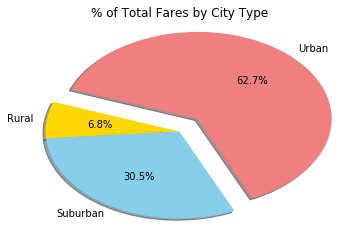

In [39]:
# Calculate Type Percents
tot_fares = df.groupby(['type'])['fare'].sum()
labels = ['Rural', 'Suburban', 'Urban']

# Build Pie Chart

plt.pie(tot_fares, explode=(0,0,.2), shadow=True, 
               colors=('gold','skyblue', 'lightcoral'), startangle=160, autopct="%1.1f%%", labels=labels)

plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig('pie_fares_by_type')


## Total Rides by City Type

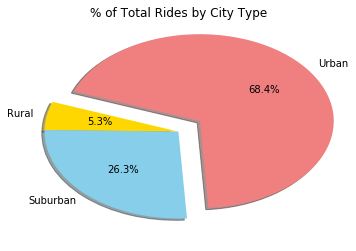

In [56]:
# Calculate Ride Percents

tot_rides = df.groupby(['type'])['ride_id'].count()

labels = ['Rural', 'Suburban', 'Urban']

# Build Pie Chart

plt.pie(tot_rides, explode=(0,0,.2), shadow=True, 
               colors=('gold','skyblue', 'lightcoral'), startangle=160, autopct="%1.1f%%", labels=labels)

plt.title("% of Total Rides by City Type")


# Save Figure

plt.savefig('pie_rides_by_type')


## Total Drivers by City Type

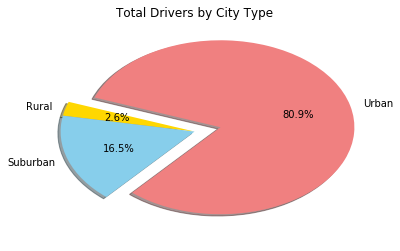

In [58]:
# Calculate Type Percents

city_data_df = city_data_df.drop_duplicates('city', keep = 'first')
tot_fares = city_data_df.groupby(['type'])['driver_count'].sum()
labels = ['Rural', 'Suburban', 'Urban']

# Build Pie Chart

plt.pie(tot_fares, explode=(0,0,.2), shadow=True, 
               colors=('gold','skyblue', 'lightcoral'), startangle=160, autopct="%1.1f%%", labels=labels)

plt.title("Total Drivers by City Type")
# Save Figure
plt.savefig('pie_drivers_by_type')
